# Import Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
raw_df = pd.read_csv(r"C:\Users\josia\Desktop\Deep Learning Capstone\insurance.csv")

# Data Wrangling

Check out dataframe

In [3]:
print(raw_df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Check for null values

In [4]:
raw_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values

Check for duplicates

In [5]:
dup = raw_df[raw_df.duplicated(keep=False)]

In [6]:
print(dup)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


Drop duplicate and reset index

In [7]:
raw_df = raw_df.drop_duplicates(keep='first')

In [8]:
raw_df = raw_df.reset_index(drop=True)

Confirm dropped duplicate and index reset

In [9]:
print(raw_df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1332   50    male  30.970         3     no  northwest  10600.54830
1333   18  female  31.920         0     no  northeast   2205.98080
1334   18  female  36.850         0     no  southeast   1629.83350
1335   21  female  25.800         0     no  southwest   2007.94500
1336   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


Statistical Measures

In [10]:
raw_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# Preprocessing (a)

In [11]:
raw_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Convert object data types to boolean by getting dummies

In [12]:
model_df = pd.get_dummies(raw_df, columns=['sex', 'smoker', 'region'], drop_first = True)

In [13]:
model_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Scale numeric all but target variable in preparation for machine learning 

In [14]:
from sklearn.preprocessing import StandardScaler
model_df2 = model_df.copy()
scaler = StandardScaler()
model_df2[['age', 'bmi', 'children']] = scaler.fit_transform(model_df2[['age', 'bmi', 'children']])

In [15]:
model_df2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,16884.92400,False,True,False,False,True
1,-1.511647,0.509422,-0.079442,1725.55230,True,False,False,True,False
2,-0.799350,0.383155,1.580143,4449.46200,True,False,False,True,False
3,-0.443201,-1.305052,-0.909234,21984.47061,True,False,True,False,False
4,-0.514431,-0.292456,-0.909234,3866.85520,True,False,True,False,False


Scale all numeric columns in preparation for machine learning

In [16]:
scaler = StandardScaler()
model_df[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(model_df[['age', 'bmi', 'children', 'charges']])

In [17]:
model_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,False,True,False,False,True
1,-1.511647,0.509422,-0.079442,-0.954381,True,False,False,True,False
2,-0.799350,0.383155,1.580143,-0.729373,True,False,False,True,False
3,-0.443201,-1.305052,-0.909234,0.719104,True,False,True,False,False
4,-0.514431,-0.292456,-0.909234,-0.777499,True,False,True,False,False


In [18]:
model_df.dtypes

age                 float64
bmi                 float64
children            float64
charges             float64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

Convert booleans to integers

In [19]:
model_df[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']] = model_df[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']].astype(int)

In [20]:
model_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,0,1,0,0,1
1,-1.511647,0.509422,-0.079442,-0.954381,1,0,0,1,0
2,-0.799350,0.383155,1.580143,-0.729373,1,0,0,1,0
3,-0.443201,-1.305052,-0.909234,0.719104,1,0,1,0,0
4,-0.514431,-0.292456,-0.909234,-0.777499,1,0,1,0,0


# Exploratory Data Analysis

<Axes: >

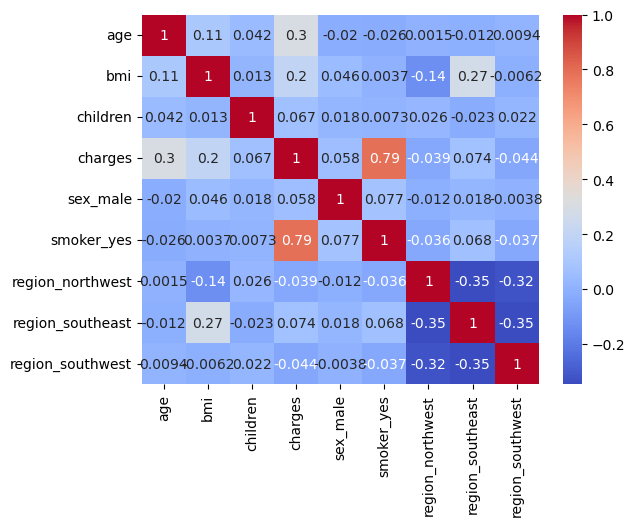

In [21]:
#correlational heatmap
corr = model_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

It appears that the top three strongest correlators with charges are smoking, age, and bmi

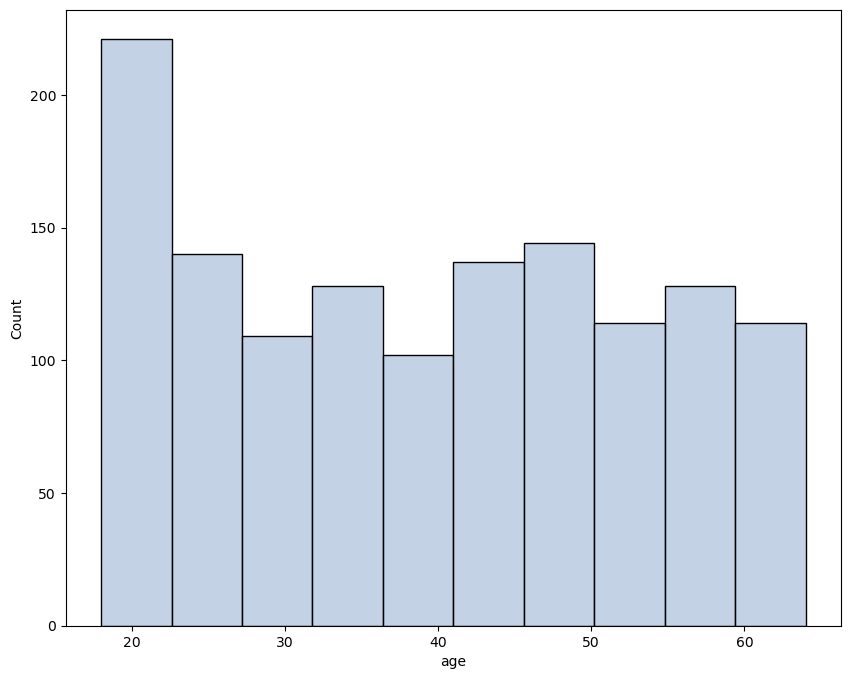

In [22]:
#distribution of age
plt.figure(figsize=(10, 8))
sns.histplot(raw_df['age'], bins=10, color='lightsteelblue')
plt.show()

It appears that age is relatively evenly distributed in this dataframe. However, there is a larger number of young individuals sampled around age 20 than in other age groups

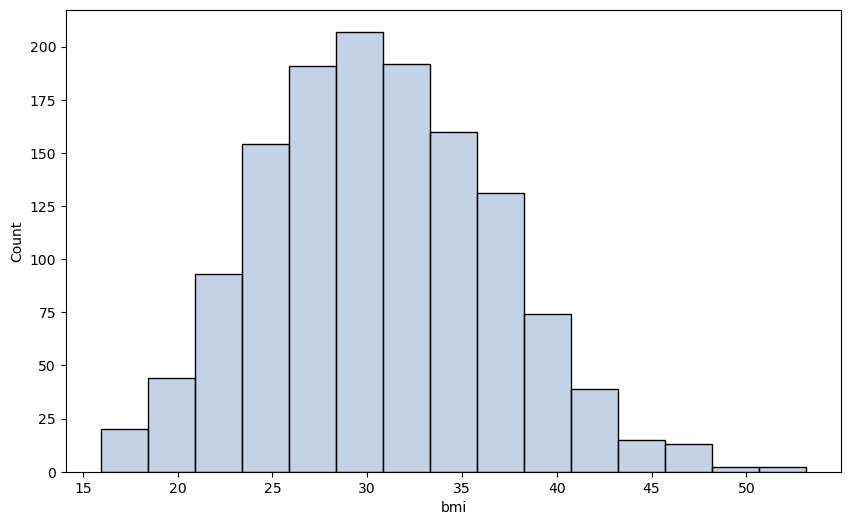

In [23]:
#distribution of bmi
plt.figure(figsize=(10, 6))
sns.histplot(raw_df['bmi'], bins=15, color='lightsteelblue')
plt.show()

It appears that bmi in our dataset has a normal distribution

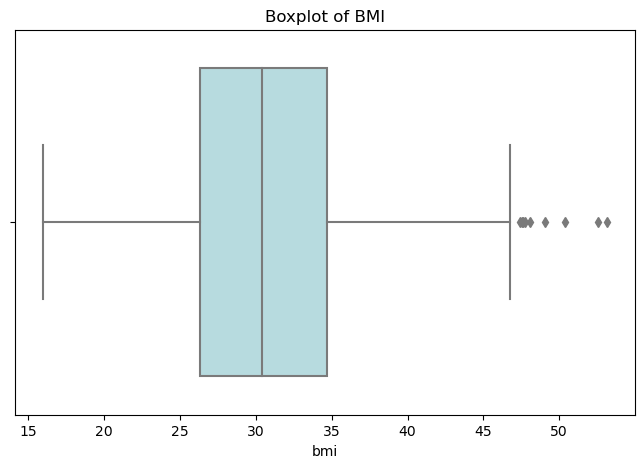

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=raw_df['bmi'], color = 'powderblue')
plt.title(f'Boxplot of BMI')
plt.show()

This distribution does have a few outliers with respect to bmi

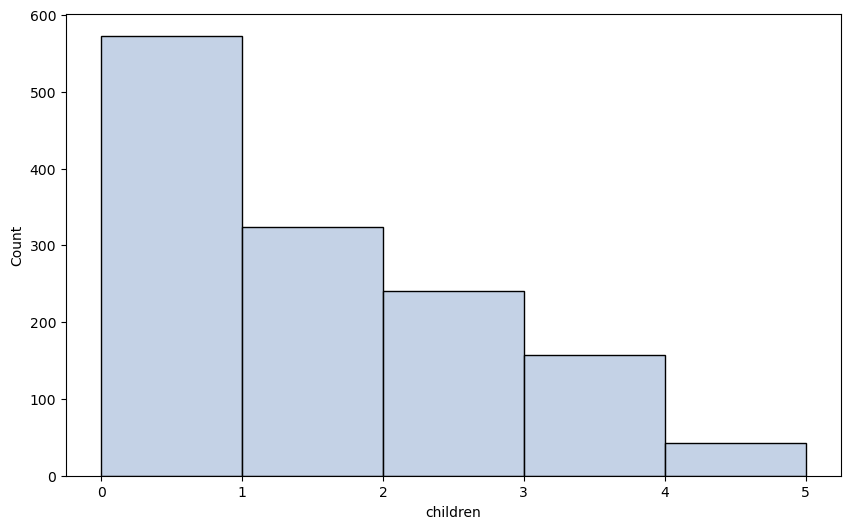

In [25]:
#distribution of no. of children
plt.figure(figsize=(10, 6))
sns.histplot(raw_df['children'], bins=5, color='lightsteelblue')
plt.show()

It appears that there is a positively skewed distribution with respect to the number of children, which the majority of indivudals having none to fewer children

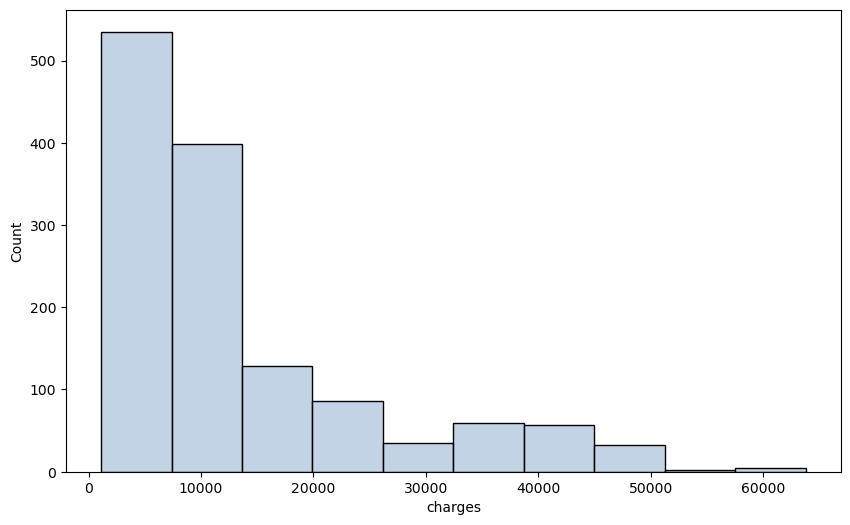

In [26]:
#distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(raw_df['charges'], bins=10, color='lightsteelblue')
plt.show()

It appears that charges also follow a positively skewed distribution; however, it is possible that there is some slight bimodalitiy in the data

<Axes: xlabel='region', ylabel='charges'>

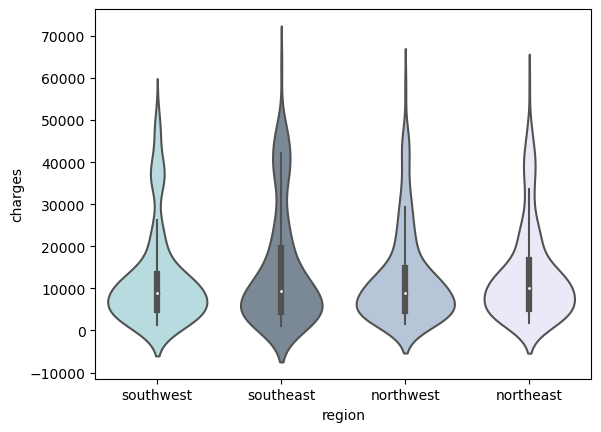

In [27]:
#distribution of charges by region
color_temp = ['powderblue', 'lightslategray', 'lightsteelblue', 'lavender']
sns.violinplot(x='region', y='charges', data=raw_df, palette=color_temp)

Examing charges by region further suggests a slight bimodality in charges distribution

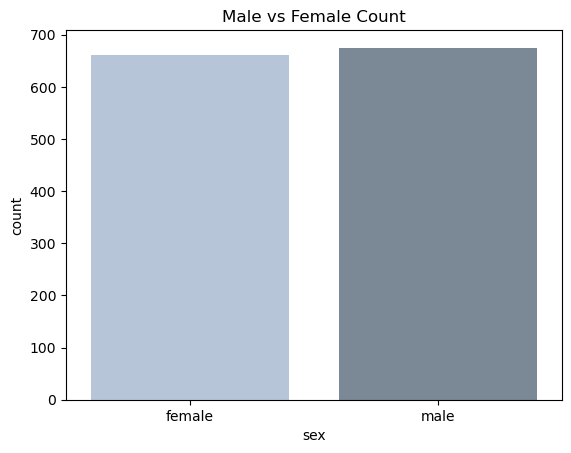

In [28]:
# sex male vs female
pal_2 = ['lightsteelblue', 'lightslategray']
sns.countplot(x='sex', data=raw_df, palette=pal_2)
plt.title('Male vs Female Count')
plt.show()

The dataset is well balanced with respect to male vs female class

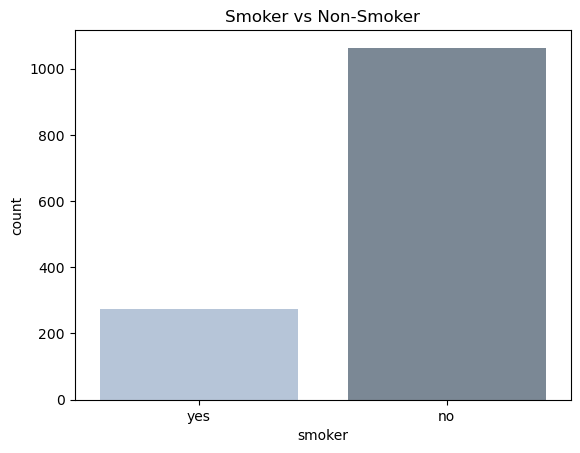

In [29]:
pal_2 = ['lightsteelblue', 'lightslategray']
sns.countplot(x='smoker', data=raw_df, palette=pal_2)
plt.title('Smoker vs Non-Smoker')
plt.show()

While smoking appears to be a great predictor of charges, the majority of individuals in this dataset are not smokers

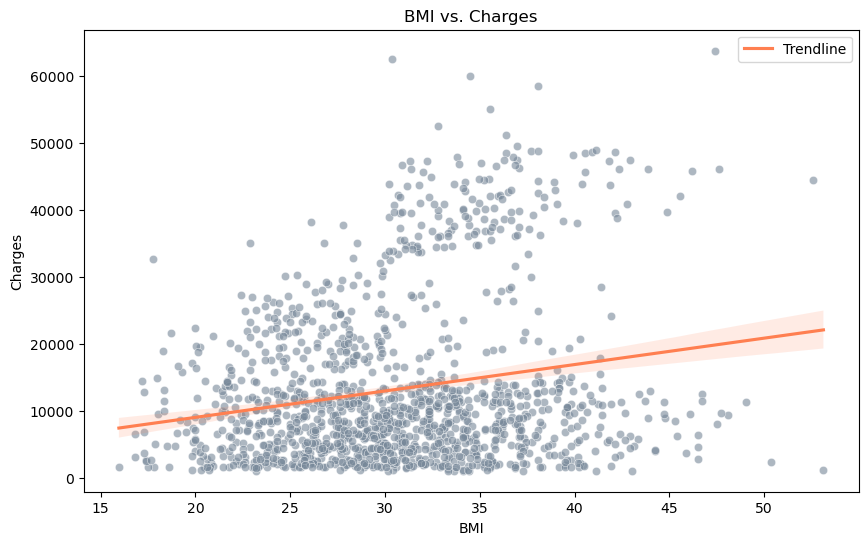

In [30]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=raw_df, x='bmi', y='charges', color='lightslategray', alpha=0.6)

sns.regplot(data=raw_df, x='bmi', y='charges', scatter=False, color='coral', label='Trendline')

plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

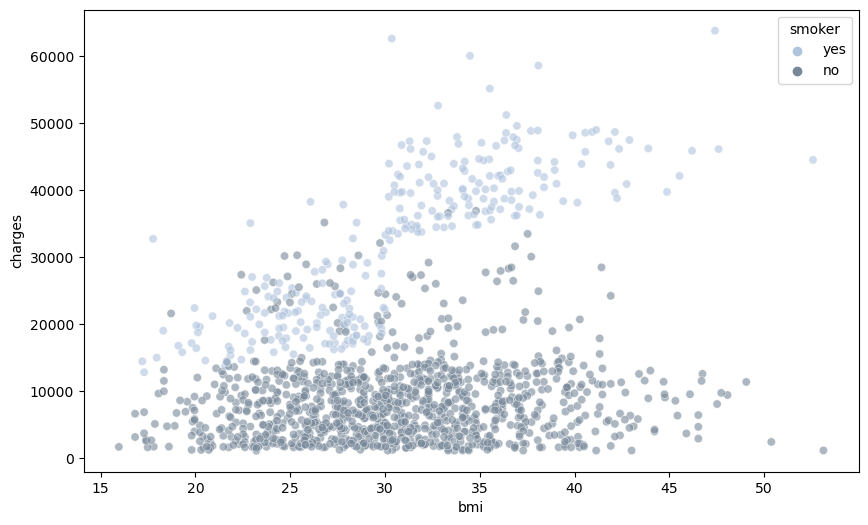

In [31]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='bmi', y='charges', hue='smoker', palette = pal_2, data=raw_df, alpha=0.6)

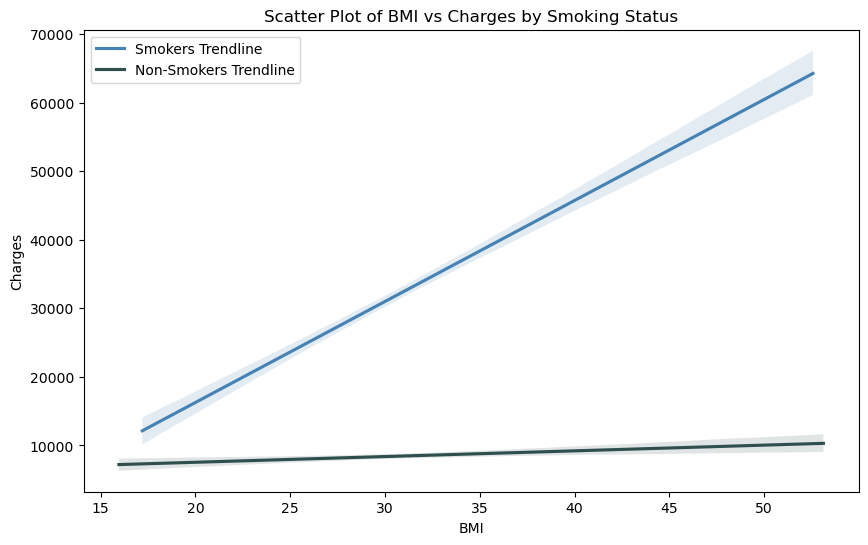

In [32]:
plt.figure(figsize=(10, 6))

sns.regplot(data=raw_df[raw_df['smoker'] == 'yes'], x='bmi', y='charges', scatter=False, color='steelblue', label='Smokers Trendline')

sns.regplot(data=raw_df[raw_df['smoker'] == 'no'], x='bmi', y='charges', scatter=False, color='darkslategray', label='Non-Smokers Trendline')

plt.title('Scatter Plot of BMI vs Charges by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()

As one can clearly see from the previous two charts, BMI is correlated with charges but if you are a smoker or not has a much greater effect on charges

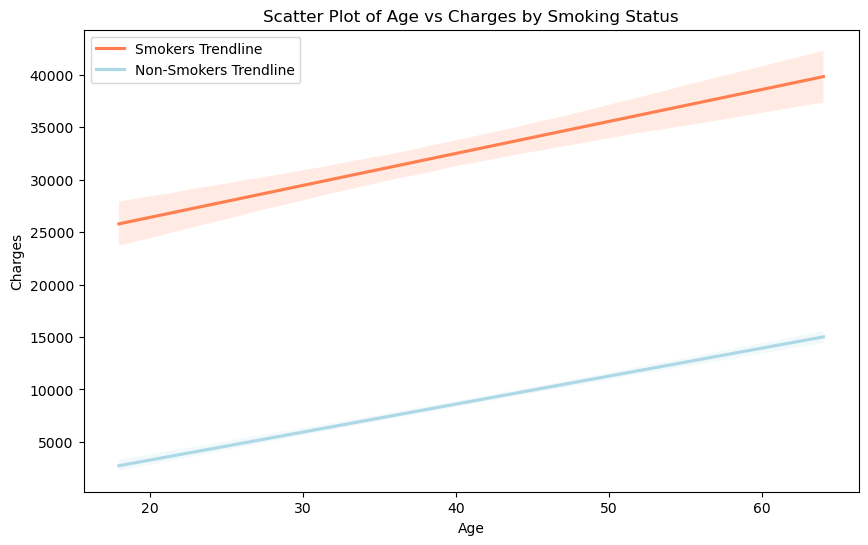

In [33]:
plt.figure(figsize=(10, 6))

sns.regplot(data=raw_df[raw_df['smoker'] == 'yes'], x='age', y='charges', scatter=False, color='coral', label='Smokers Trendline')

sns.regplot(data=raw_df[raw_df['smoker'] == 'no'], x='age', y='charges', scatter=False, color='lightblue', label='Non-Smokers Trendline')

plt.title('Scatter Plot of Age vs Charges by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

This chart is very intersting because it shows that age is also a good predictor of charges; however, if you smoke, you are at a much greater risk of having higher charges across your entire lifespan

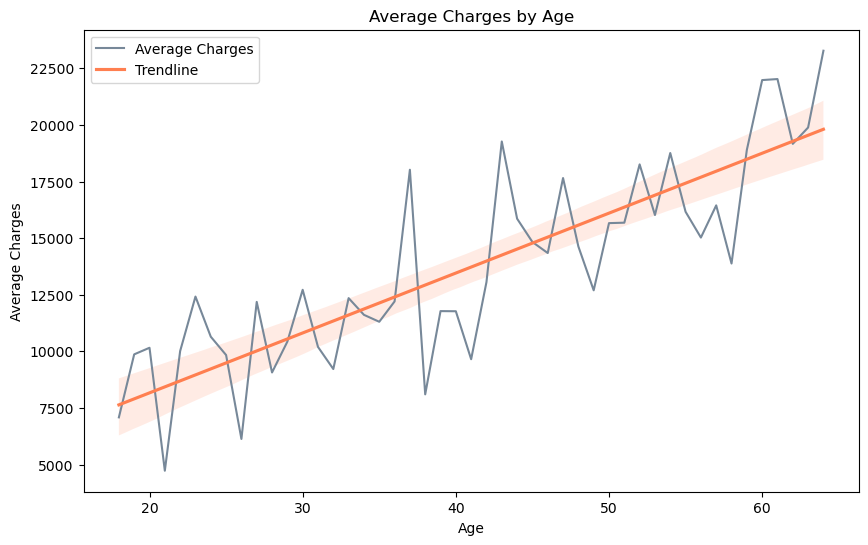

In [34]:
average_charges_by_age = raw_df.groupby('age')['charges'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=average_charges_by_age, x='age', y='charges', color='lightslategray', label='Average Charges')

sns.regplot(data=average_charges_by_age, x='age', y='charges', scatter=False, color='coral', label='Trendline')

plt.title('Average Charges by Age')
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.legend()
plt.show()

# Modeling

In [35]:
model_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,0,1,0,0,1
1,-1.511647,0.509422,-0.079442,-0.954381,1,0,0,1,0
2,-0.799350,0.383155,1.580143,-0.729373,1,0,0,1,0
3,-0.443201,-1.305052,-0.909234,0.719104,1,0,1,0,0
4,-0.514431,-0.292456,-0.909234,-0.777499,1,0,1,0,0


In [36]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestRegressor

# Neural Network - Scaled Target Variable

In [37]:
# Model Prep
X = model_df.drop('charges', axis=1) 
y = model_df['charges']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [38]:
#Build the Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  
model.add(Dense(32, activation='relu'))  
model.add(Dense(16, activation='relu')) 
model.add(Dense(1)) 

#Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping_monitor = EarlyStopping(patience=3)

#Train model
history = model.fit(X_train, y_train, epochs = 200, batch_size=32, validation_split=0.2, verbose=1, callbacks = [early_stopping_monitor])

C:\Users\josia\anaconda3\Desktop\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9309 - mean_absolute_error: 0.7166 - val_loss: 0.7749 - val_mean_absolute_error: 0.6524
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7208 - mean_absolute_error: 0.6381 - val_loss: 0.4948 - val_mean_absolute_error: 0.5226
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4790 - mean_absolute_error: 0.5169 - val_loss: 0.2497 - val_mean_absolute_error: 0.3318
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2343 - mean_absolute_error: 0.3405 - val_loss: 0.1850 - val_mean_absolute_error: 0.2968
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1845 - mean_absolute_error: 0.2810 - val_loss: 0.1555 - val_mean_absolute_error: 0.2320
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1878 - mean_absolute_error: 0.2709 - val_loss: 0.1414 - val_mean_absolute_error: 0.2211
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1668 - mean_absolute_error: 0.2619 - val_loss

In [39]:
#Evaluate the Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Absolute Error: 0.2731
Mean Squared Error: 0.1862
R^2 Score: 0.7984


# Baseline Random Forest Regression

In [40]:
# Model Prep
X = model_df2.drop('charges', axis=1) 
y = model_df2['charges']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 2943.5606804044774
Mean Squared Error: 27022624.52631487
R-squared: 0.8003684636852837


# Neural Network - Unscaled Target Variable

In [41]:
# Model Prep
X = model_df2.drop('charges', axis=1) 
y = model_df2['charges']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [42]:
#Build the Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  
model.add(Dense(32, activation='relu'))  
model.add(Dense(16, activation='relu')) 
model.add(Dense(1)) 

#Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping_monitor = EarlyStopping(patience=3)

#Train model
history = model.fit(X_train, y_train, epochs = 200, batch_size=32, validation_split=0.2, verbose=1, callbacks = [early_stopping_monitor])

Epoch 1/200


C:\Users\josia\anaconda3\Desktop\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 345593824.0000 - mean_absolute_error: 13875.7314 - val_loss: 291409632.0000 - val_mean_absolute_error: 12099.8535
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 328742784.0000 - mean_absolute_error: 13358.1865 - val_loss: 291324512.0000 - val_mean_absolute_error: 12096.5869
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 341053920.0000 - mean_absolute_error: 13756.3340 - val_loss: 291072256.0000 - val_mean_absolute_error: 12087.2783
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322971040.0000 - mean_absolute_error: 13299.6494 - val_loss: 290399264.0000 - val_mean_absolute_error: 12063.0596
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 305523360.0000 - mean_absolute_error: 12908.4268 - val_loss: 288833792.0000 - val_mean_absolute_error: 12007.6709
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 297441344.0000 - mean_absolute_error: 12830.4600 - val_loss: 285704416.0000 - val_mean_a

Epoch 41/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58532000.0000 - mean_absolute_error: 5862.4355 - val_loss: 53570724.0000 - val_mean_absolute_error: 5622.1548
Epoch 42/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57488688.0000 - mean_absolute_error: 5931.7012 - val_loss: 51824240.0000 - val_mean_absolute_error: 5536.3086
Epoch 43/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56534312.0000 - mean_absolute_error: 5810.2510 - val_loss: 49993124.0000 - val_mean_absolute_error: 5418.0288
Epoch 44/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54050192.0000 - mean_absolute_error: 5787.5293 - val_loss: 48338448.0000 - val_mean_absolute_error: 5337.0498
Epoch 45/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51253352.0000 - mean_absolute_error: 5567.7935 - val_loss: 46645464.0000 - val_mean_absolute_error: 5226.6929
Epoch 46/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44456432.0000 - mean_absolute_error: 5141.4355 - val_loss: 45129776.0000 - val_mean_absolu

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35420092.0000 - mean_absolute_error: 3997.6577 - val_loss: 29560398.0000 - val_mean_absolute_error: 3553.7241
Epoch 82/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39139708.0000 - mean_absolute_error: 4256.6997 - val_loss: 29513926.0000 - val_mean_absolute_error: 3551.9285
Epoch 83/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35296788.0000 - mean_absolute_error: 4005.4941 - val_loss: 29345882.0000 - val_mean_absolute_error: 3519.1548
Epoch 84/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32415604.0000 - mean_absolute_error: 3789.3066 - val_loss: 29266148.0000 - val_mean_absolute_error: 3503.5273
Epoch 85/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34116940.0000 - mean_absolute_error: 3899.8447 - val_loss: 29212038.0000 - val_mean_absolute_error: 3519.4304
Epoch 86/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28837792.0000 - mean_absolute_error: 3626.9077 - val_loss: 29158968.0000 - val_mean_absolute_error: 350

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31432440.0000 - mean_absolute_error: 3624.1641 - val_loss: 26579464.0000 - val_mean_absolute_error: 3204.3374
Epoch 122/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30110980.0000 - mean_absolute_error: 3542.8267 - val_loss: 26536664.0000 - val_mean_absolute_error: 3209.9258
Epoch 123/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30390546.0000 - mean_absolute_error: 3582.5947 - val_loss: 26489768.0000 - val_mean_absolute_error: 3195.6970
Epoch 124/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29947934.0000 - mean_absolute_error: 3450.5378 - val_loss: 26399906.0000 - val_mean_absolute_error: 3177.0740
Epoch 125/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31975584.0000 - mean_absolute_error: 3665.4075 - val_loss: 26353188.0000 - val_mean_absolute_error: 3162.9563
Epoch 126/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28001316.0000 - mean_absolute_error: 3405.3738 - val_loss: 26307872.0000 - val_mean_absolute_error

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25591680.0000 - mean_absolute_error: 3130.6394 - val_loss: 24469252.0000 - val_mean_absolute_error: 2970.3374
Epoch 162/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27380636.0000 - mean_absolute_error: 3343.7280 - val_loss: 24403600.0000 - val_mean_absolute_error: 2978.4387
Epoch 163/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27695082.0000 - mean_absolute_error: 3284.1929 - val_loss: 24303422.0000 - val_mean_absolute_error: 2941.6682
Epoch 164/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32581972.0000 - mean_absolute_error: 3560.3188 - val_loss: 24215014.0000 - val_mean_absolute_error: 2935.2654
Epoch 165/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26910784.0000 - mean_absolute_error: 3211.1951 - val_loss: 24194172.0000 - val_mean_absolute_error: 2932.6826
Epoch 166/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25362334.0000 - mean_absolute_error: 3090.7876 - val_loss: 24062778.0000 - val_mean_absolute_error

In [43]:
#Evaluate Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Absolute Error: 3056.8545
Mean Squared Error: 27354454.1795
R^2 Score: 0.7979


# Reflection

It appears that the unscaled target variable does not have much of an impact on model performance. The advantage of not scaling the target variable is that the MAE and MSE are more interpretable. 

# Neural Network Architecture Optimization - multiple tested (best shown)

In [44]:
#Build the Model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))  
model.add(Dense(50, activation='relu'))  
model.add(Dense(25, activation='relu')) 
model.add(Dense(1)) 

#Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping_monitor = EarlyStopping(patience=3)

#Train model
history = model.fit(X_train, y_train, epochs = 200, batch_size=32, validation_split=0.2, verbose=1, callbacks = [early_stopping_monitor])

Epoch 1/200


C:\Users\josia\anaconda3\Desktop\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 357640512.0000 - mean_absolute_error: 14225.3477 - val_loss: 291360640.0000 - val_mean_absolute_error: 12097.8643
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 312569024.0000 - mean_absolute_error: 13119.3086 - val_loss: 290989440.0000 - val_mean_absolute_error: 12083.7441
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 362688384.0000 - mean_absolute_error: 14239.2080 - val_loss: 289604832.0000 - val_mean_absolute_error: 12033.0693
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 314141920.0000 - mean_absolute_error: 13098.9414 - val_loss: 285499136.0000 - val_mean_absolute_error: 11887.0117
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 324109248.0000 - mean_absolute_error: 13224.5244 - val_loss: 275973824.0000 - val_mean_absolute_error: 11549.5586
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 333834464.0000 - mean_absolute_error: 13261.7754 - val_loss: 257961632.0000 - val_mean_a

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38077116.0000 - mean_absolute_error: 4495.9492 - val_loss: 32589436.0000 - val_mean_absolute_error: 4062.5115
Epoch 42/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38036320.0000 - mean_absolute_error: 4473.5933 - val_loss: 32109272.0000 - val_mean_absolute_error: 3991.0430
Epoch 43/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33453760.0000 - mean_absolute_error: 4262.4023 - val_loss: 31665038.0000 - val_mean_absolute_error: 3910.5515
Epoch 44/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35797152.0000 - mean_absolute_error: 4210.4614 - val_loss: 31322286.0000 - val_mean_absolute_error: 3853.3335
Epoch 45/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32605864.0000 - mean_absolute_error: 4035.0242 - val_loss: 31120482.0000 - val_mean_absolute_error: 3836.0188
Epoch 46/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36749384.0000 - mean_absolute_error: 4251.5278 - val_loss: 30879574.0000 - val_mean_absolute_error: 379

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35225432.0000 - mean_absolute_error: 3912.0547 - val_loss: 26968110.0000 - val_mean_absolute_error: 3265.1785
Epoch 82/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31615350.0000 - mean_absolute_error: 3623.0999 - val_loss: 26917576.0000 - val_mean_absolute_error: 3250.8323
Epoch 83/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29228708.0000 - mean_absolute_error: 3524.8062 - val_loss: 26836580.0000 - val_mean_absolute_error: 3265.5281
Epoch 84/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32676582.0000 - mean_absolute_error: 3778.9456 - val_loss: 26761016.0000 - val_mean_absolute_error: 3267.2351
Epoch 85/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27158052.0000 - mean_absolute_error: 3370.5146 - val_loss: 26717652.0000 - val_mean_absolute_error: 3250.5479
Epoch 86/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32092276.0000 - mean_absolute_error: 3646.2910 - val_loss: 26606432.0000 - val_mean_absolute_error: 323

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28184616.0000 - mean_absolute_error: 3264.0344 - val_loss: 23544678.0000 - val_mean_absolute_error: 2923.4688
Epoch 122/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27992870.0000 - mean_absolute_error: 3304.4617 - val_loss: 23408160.0000 - val_mean_absolute_error: 2881.3923
Epoch 123/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27203220.0000 - mean_absolute_error: 3151.2390 - val_loss: 23335754.0000 - val_mean_absolute_error: 2880.0088
Epoch 124/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25475108.0000 - mean_absolute_error: 3183.5044 - val_loss: 23163562.0000 - val_mean_absolute_error: 2884.2957
Epoch 125/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28996680.0000 - mean_absolute_error: 3333.3845 - val_loss: 23027444.0000 - val_mean_absolute_error: 2832.9807
Epoch 126/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29390898.0000 - mean_absolute_error: 3374.2139 - val_loss: 22941896.0000 - val_mean_absolute_error

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24938782.0000 - mean_absolute_error: 2954.1360 - val_loss: 19426486.0000 - val_mean_absolute_error: 2615.0337
Epoch 162/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25083754.0000 - mean_absolute_error: 2943.6738 - val_loss: 19291078.0000 - val_mean_absolute_error: 2535.2036
Epoch 163/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21862974.0000 - mean_absolute_error: 2757.5969 - val_loss: 19290122.0000 - val_mean_absolute_error: 2552.8040
Epoch 164/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22016578.0000 - mean_absolute_error: 2794.4619 - val_loss: 19316876.0000 - val_mean_absolute_error: 2572.9983
Epoch 165/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25238874.0000 - mean_absolute_error: 2952.7312 - val_loss: 19208994.0000 - val_mean_absolute_error: 2533.0244
Epoch 166/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21730554.0000 - mean_absolute_error: 2782.1963 - val_loss: 19146138.0000 - val_mean_absolute_error

In [45]:
#Evaluate Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Absolute Error: 2950.0213
Mean Squared Error: 26496071.7851
R^2 Score: 0.8043


The larger number of nodes improved network performance

# Check Neural Network Performance with optimal architecture on scaled target variable

In [46]:
# Model Prep
X = model_df.drop('charges', axis=1) 
y = model_df['charges']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [47]:
#Build the Model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))  
model.add(Dense(50, activation='relu'))  
model.add(Dense(25, activation='relu')) 
model.add(Dense(1)) 

#Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping_monitor = EarlyStopping(patience=3)

#Train model
history = model.fit(X_train, y_train, epochs = 200, batch_size=32, validation_split=0.2, verbose=1, callbacks = [early_stopping_monitor])

Epoch 1/200


C:\Users\josia\anaconda3\Desktop\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9730 - mean_absolute_error: 0.7309 - val_loss: 0.7767 - val_mean_absolute_error: 0.6659
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7826 - mean_absolute_error: 0.6654 - val_loss: 0.3791 - val_mean_absolute_error: 0.4452
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3236 - mean_absolute_error: 0.4117 - val_loss: 0.1740 - val_mean_absolute_error: 0.2617
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1830 - mean_absolute_error: 0.2817 - val_loss: 0.1462 - val_mean_absolute_error: 0.2287
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1647 - mean_absolute_error: 0.2518 - val_loss: 0.1332 - val_mean_absolute_error: 0.2115
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1670 - mean_absolute_error: 0.2498 - val_loss: 0.1286 - val_mean_absolute_error: 0.2151
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1312 - mean_absolute_error: 0.2196 - val_loss: 0.1357 - v

In [48]:
#Evaluate the Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Absolute Error: 0.2481
Mean Squared Error: 0.1908
R^2 Score: 0.7934


# Final Model:

In [49]:
# Model Prep
X = model_df2.drop('charges', axis=1) 
y = model_df2['charges']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [50]:
#Build the Model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))  
model.add(Dense(50, activation='relu'))  
model.add(Dense(25, activation='relu')) 
model.add(Dense(1)) 

#Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping_monitor = EarlyStopping(patience=3)

#Train model
history = model.fit(X_train, y_train, epochs = 200, batch_size=32, validation_split=0.2, verbose=1, callbacks = [early_stopping_monitor])

Epoch 1/200


C:\Users\josia\anaconda3\Desktop\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 322332704.0000 - mean_absolute_error: 13351.6494 - val_loss: 291374336.0000 - val_mean_absolute_error: 12098.5811
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 332503232.0000 - mean_absolute_error: 13565.1084 - val_loss: 291083296.0000 - val_mean_absolute_error: 12087.8906
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 333347456.0000 - mean_absolute_error: 13649.8027 - val_loss: 289990912.0000 - val_mean_absolute_error: 12049.0127
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 337153568.0000 - mean_absolute_error: 13744.1592 - val_loss: 286780384.0000 - val_mean_absolute_error: 11936.5938
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 376752032.0000 - mean_absolute_error: 14403.7539 - val_loss: 279368928.0000 - val_mean_absolute_error: 11678.4160
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 326823232.0000 - mean_absolute_error: 13280.2705 - val_loss: 264387824.0000 - val_mean_a

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40757280.0000 - mean_absolute_error: 4694.1226 - val_loss: 32538652.0000 - val_mean_absolute_error: 4041.2549
Epoch 42/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38000696.0000 - mean_absolute_error: 4408.2788 - val_loss: 32015920.0000 - val_mean_absolute_error: 3929.9717
Epoch 43/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34102416.0000 - mean_absolute_error: 4112.5083 - val_loss: 31781228.0000 - val_mean_absolute_error: 3951.1782
Epoch 44/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35224564.0000 - mean_absolute_error: 4146.6108 - val_loss: 31358000.0000 - val_mean_absolute_error: 3816.5132
Epoch 45/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35166444.0000 - mean_absolute_error: 4190.8315 - val_loss: 31174238.0000 - val_mean_absolute_error: 3822.0251
Epoch 46/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35645364.0000 - mean_absolute_error: 4161.5728 - val_loss: 30918378.0000 - val_mean_absolute_error: 378

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35058044.0000 - mean_absolute_error: 3811.9136 - val_loss: 26928960.0000 - val_mean_absolute_error: 3271.3435
Epoch 82/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31532922.0000 - mean_absolute_error: 3709.8347 - val_loss: 26939852.0000 - val_mean_absolute_error: 3287.4971
Epoch 83/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31417276.0000 - mean_absolute_error: 3588.9375 - val_loss: 26860820.0000 - val_mean_absolute_error: 3279.3213
Epoch 84/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30420056.0000 - mean_absolute_error: 3535.9404 - val_loss: 26735320.0000 - val_mean_absolute_error: 3226.8201
Epoch 85/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29224392.0000 - mean_absolute_error: 3514.3916 - val_loss: 26684074.0000 - val_mean_absolute_error: 3253.1387
Epoch 86/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31514672.0000 - mean_absolute_error: 3633.8921 - val_loss: 26545484.0000 - val_mean_absolute_error: 323

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26586518.0000 - mean_absolute_error: 3206.6428 - val_loss: 23818598.0000 - val_mean_absolute_error: 2906.8301
Epoch 122/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25175934.0000 - mean_absolute_error: 3110.6104 - val_loss: 23765768.0000 - val_mean_absolute_error: 2876.6565
Epoch 123/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28991170.0000 - mean_absolute_error: 3281.9890 - val_loss: 23653946.0000 - val_mean_absolute_error: 2898.7107
Epoch 124/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23786776.0000 - mean_absolute_error: 3027.0400 - val_loss: 23560144.0000 - val_mean_absolute_error: 2885.5161
Epoch 125/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27868182.0000 - mean_absolute_error: 3173.7026 - val_loss: 23495090.0000 - val_mean_absolute_error: 2891.5352
Epoch 126/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26401756.0000 - mean_absolute_error: 3057.7371 - val_loss: 23370090.0000 - val_mean_absolute_error

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22226812.0000 - mean_absolute_error: 2826.8010 - val_loss: 20822182.0000 - val_mean_absolute_error: 2695.9321
Epoch 162/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22341846.0000 - mean_absolute_error: 2862.7903 - val_loss: 20769068.0000 - val_mean_absolute_error: 2663.9438
Epoch 163/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23333910.0000 - mean_absolute_error: 3049.6523 - val_loss: 20656638.0000 - val_mean_absolute_error: 2678.3086
Epoch 164/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28706476.0000 - mean_absolute_error: 3160.0962 - val_loss: 20649772.0000 - val_mean_absolute_error: 2726.8884
Epoch 165/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23263030.0000 - mean_absolute_error: 3003.6504 - val_loss: 20520684.0000 - val_mean_absolute_error: 2698.4944
Epoch 166/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23921904.0000 - mean_absolute_error: 2963.9216 - val_loss: 20455714.0000 - val_mean_absolute_error

In [51]:
#Evaluate Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Absolute Error: 2964.0826
Mean Squared Error: 26763913.8083
R^2 Score: 0.8023
